In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('homeprices.csv')
df.sample(5)

,area,bedrooms,price
5,1170,2,38.0
18,2770,3,102.0
16,1180,3,48.0
15,1175,2,42.0
1,2600,4,120.0


In [3]:
df[['area', 'bedrooms']]

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [58]:
df['area'].max()

3700

In [4]:
from sklearn import preprocessing
px = preprocessing.MinMaxScaler()
py = preprocessing.MinMaxScaler()

scaled_x = px.fit_transform(df.drop("price", axis="columns"))
scaled_y = px.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [54]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_x.shape

(20, 2)

In [9]:
df[['area', 'bedrooms']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
area,1056,2600,1440,1521,1200,1170,2732,3300,1310,3700,1800,2785,1000,1100,2250,1175,1180,1540,2770,800
bedrooms,2,4,3,3,2,2,4,4,3,5,3,4,2,2,3,2,3,3,3,1


                    ( [d, e]        
( [a, b , c] )    *   [f, g]        =  ( [a.d + b.f + c.n, a.e + b.g + c.r] )
              1x3     [n, r] )                                               1x2
                              3x2

In [10]:
m = np.ones(scaled_x.shape[1])
m

array([1., 1.])

In [11]:
res =  np.dot(m, scaled_x.T)
res

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [71]:
def batch_gradient_descent(x, y_true, epochs, learning_rate=0.01):
    number_of_features = x.shape[1]
    number_of_samples = x.shape[0]
    w = np.ones(number_of_features)
    b = 0
    loss_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, x.T) + b
        w_der = (number_of_features/number_of_samples)*(np.dot(x.T, (y_predicted- y_true))) # dLoss/dw
        w = w - learning_rate*(w_der)
        b_der = (number_of_features/number_of_samples)*np.sum(y_predicted- y_true)
        b = b - learning_rate*(b_der)

        loss = np.mean(np.square(y_true-y_predicted))

        if i%10 == 0:
            loss_list.append(loss)
            epoch_list.append(i)

    return w, b, loss_list, epoch_list


In [67]:
w, b, loss_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

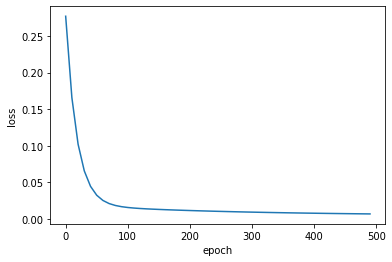

In [68]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(epoch_list, loss_list)

In [106]:
area = [[1800],[2000],[2500]]
area_df = pd.DataFrame(area)
area_np = np.array(area_df)
area_np

array([[1800],
       [2000],
       [2500]], dtype=int64)

In [107]:
bedrooms = [[3],[4],[5]]
bedrooms_df = pd.DataFrame(bedrooms)
bedrooms_np = np.array(bedrooms_df)
bedrooms_np

array([[3],
       [4],
       [5]], dtype=int64)

In [69]:
def predict(area_value, bedrooms_value, w, b):
    max_value_in_area = df['area'].max()
    min_value_in_area = df['area'].min()
    scaled_area_value = (area_value - min_value_in_area)*100/(max_value_in_area - min_value_in_area)
    
    max_value_in_bedrooms = df['bedrooms'].max()
    min_value_in_bedrooms = df['bedrooms'].min()
    scaled_bedrooms_value = (bedrooms_value - min_value_in_bedrooms)*100/(max_value_in_bedrooms - min_value_in_bedrooms)

    scaled_price = w[0]*scaled_area_value + w[1]*scaled_bedrooms_value + b
    return scaled_price

In [76]:
df.columns

Index(['area', 'bedrooms', 'price'], dtype='object')

In [72]:
predict(2600,4,w,b)

94.25254148082035